# Exploratory data analysis

## Wiki information about images

In [4]:
import pandas as pd

# Path to the CSV file
csv_file_path = '../data/raw/vgdb_2016/vgdb_2016.csv'

# Load the CSV into a DataFrame
data = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(data.head())

# Display the summary of the DataFrame
print(data.info())


    PageID                                     DescriptionURL  \
0   149071  http://commons.wikimedia.org/wiki/File:Paul_C%...   
1   151874  http://commons.wikimedia.org/wiki/File:Vincent...   
2   809945  http://commons.wikimedia.org/wiki/File:Whiteho...   
3  1595836  http://commons.wikimedia.org/wiki/File:Jean_Ja...   
4  1869973  http://commons.wikimedia.org/wiki/File:Blake_j...   

                                            ImageURL  \
0  http://upload.wikimedia.org/wikipedia/commons/...   
1  http://upload.wikimedia.org/wikipedia/commons/...   
2  http://upload.wikimedia.org/wikipedia/commons/...   
3  http://upload.wikimedia.org/wikipedia/commons/...   
4  http://upload.wikimedia.org/wikipedia/commons/...   

                                  ImageSHA1  PixelHeight  PixelWidth  \
0  cdcdeed0d2667884b7362e6e1a0deb5d26d010f6         5700        3952   
1  fd61fa5a06507e0f2e919eac5828f5c4a2951226         5939        7560   
2  3b52b91662bdef61268b9ba459e04214913142ce        10528

## Exploring van gogh paintings

In [5]:
from PIL import Image
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Example usage
train_folder_path = '../data/raw/vgdb_2016/train/vg'
train_van_gogh_images = load_images_from_folder(train_folder_path)


test_folder_path = '../data/raw/vgdb_2016/test/vg'
test_van_gogh_images = load_images_from_folder(test_folder_path)



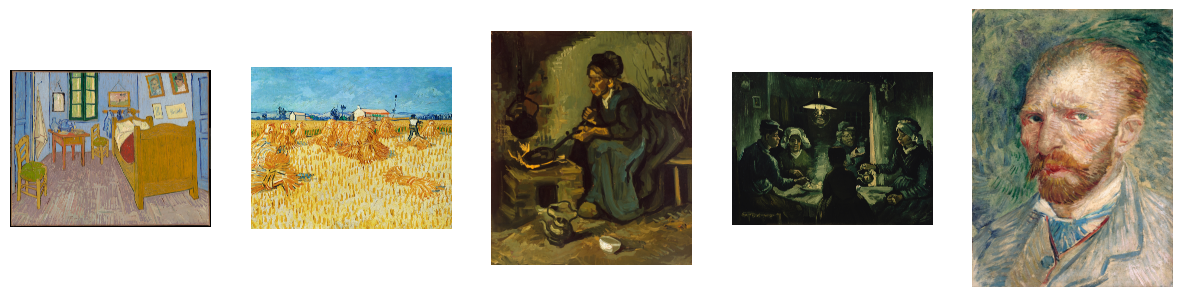

In [6]:
import matplotlib.pyplot as plt

# Display the first 5 images
plt.figure(figsize=(15, 10))
for i, img in enumerate(train_van_gogh_images[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


## Exploring non-van gogh paintings

In [7]:
from PIL import Image
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Example usage
train_folder_path = '../data/raw/vgdb_2016/train/nvg'  # Adjust the path according to your project structure
train_non_van_gogh_images = load_images_from_folder(train_folder_path)

test_folder_path = '../data/raw/vgdb_2016/test/nvg'  # Adjust the path according to your project structure
test_non_van_gogh_images = load_images_from_folder(test_folder_path)


c:\Users\Krish\OneDrive\Desktop\ResumeProjects\Van-gogh-painting-identification\venv\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (178946307 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


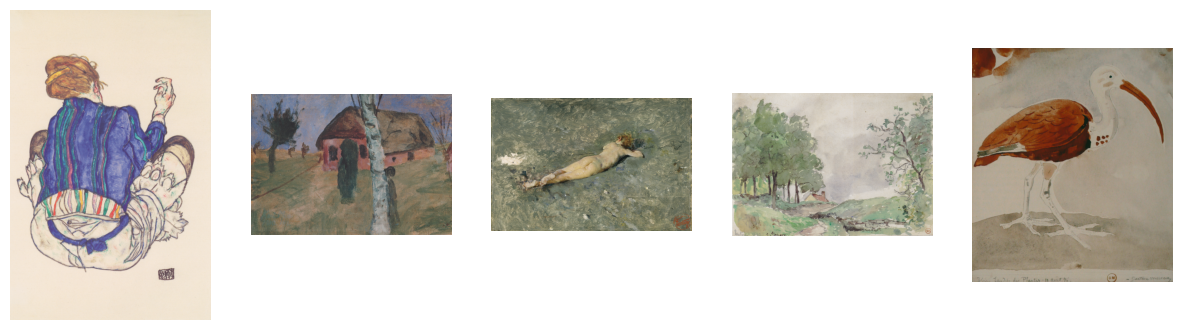

In [8]:
import matplotlib.pyplot as plt

# Display the first 5 images
plt.figure(figsize=(15, 10))
for i, img in enumerate(train_non_van_gogh_images[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


In [9]:
def analyze_image_objects(image_objects):
    sizes = {}
    modes = {}
    for img in image_objects:
        try:
            size = img.size
            mode = img.mode
            sizes[size] = sizes.get(size, 0) + 1
            modes[mode] = modes.get(mode, 0) + 1
        except Exception as e:
            print(f"Error analyzing image: {e}")
    return sizes, modes

# Use it like this:
van_gogh_sizes, van_gogh_modes = analyze_image_objects(train_van_gogh_images)
non_van_gogh_sizes, non_van_gogh_modes = analyze_image_objects(train_non_van_gogh_images)

print("Van Gogh Image Sizes:", van_gogh_sizes)
print("Van Gogh Image Modes:", van_gogh_modes)
print("Non-Van Gogh Image Sizes:", non_van_gogh_sizes)
print("Non-Van Gogh Image Modes:", non_van_gogh_modes)


Van Gogh Image Sizes: {(5713, 4467): 1, (4789, 3865): 1, (2945, 3433): 1, (7285, 5556): 1, (1846, 2556): 1, (5085, 4345): 1, (4804, 3942): 1, (2996, 2317): 1, (2317, 3130): 1, (4142, 5595): 1, (1924, 2827): 1, (2175, 3436): 1, (3470, 2395): 1, (1846, 2410): 1, (2085, 2552): 1, (711, 1276): 1, (4430, 3730): 1, (3594, 2950): 1, (2487, 3141): 1, (1890, 2487): 1, (735, 1826): 1, (3218, 2552): 1, (7107, 5900): 1, (2242, 2354): 1, (3123, 2203): 1, (3109, 2358): 1, (1623, 2104): 1, (3092, 2098): 1, (2474, 3260): 1, (3324, 2664): 1, (2010, 3146): 1, (2358, 3120): 1, (2592, 3467): 1, (2863, 1701): 1, (2441, 3169): 1, (3318, 2750): 1, (3161, 2597): 1, (3323, 2419): 1, (3174, 2280): 1, (3208, 3024): 1, (3455, 2512): 1, (3377, 2551): 1, (1995, 1469): 1, (2108, 1585): 1, (1739, 2132): 1, (2087, 2741): 1, (1856, 2512): 1, (3199, 2551): 1, (2513, 3291): 1, (1237, 1716): 1, (3317, 1630): 1, (2474, 3166): 1, (2970, 3554): 1, (2087, 2766): 1, (2937, 4926): 1, (2513, 3114): 1, (2678, 2049): 1, (1469, 215

In [10]:
print(f"Number of Train Van Gogh images: {len(train_van_gogh_images)}")
print(f"Number of Test Van Gogh images: {len(test_van_gogh_images)}")
print(f"Number of Train Non-Van Gogh images: {len(train_non_van_gogh_images)}")
print(f"Number of Test Non-Van Gogh images: {len(test_non_van_gogh_images)}")


Number of Train Van Gogh images: 99
Number of Test Van Gogh images: 25
Number of Train Non-Van Gogh images: 165
Number of Test Non-Van Gogh images: 42


# Patch based analysis

## van gogh

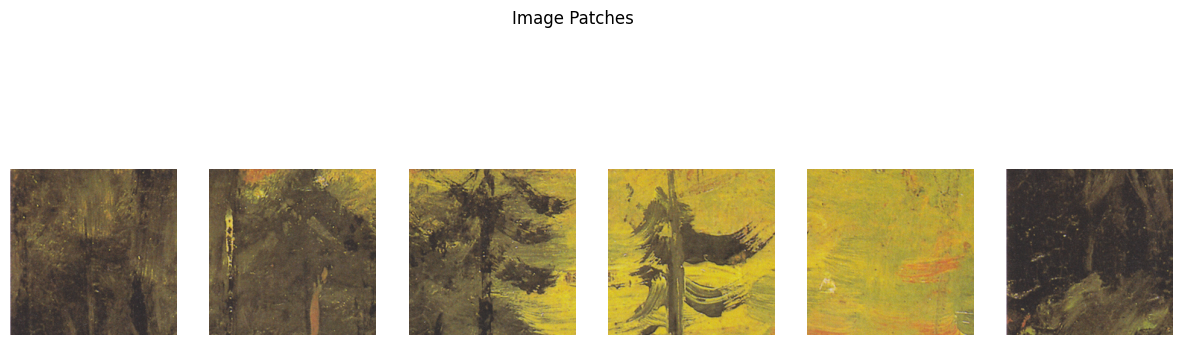

In [ ]:
import sys
sys.path.append('../src')
from preprocessing_patches import patchify_image

image_path = '../data/raw/vgdb_2016/train/vg/vg_9395208.png'

patches = patchify_image(Image.open(image_path).convert("RGB"))

# Show first 6 patches
plt.figure(figsize=(15, 5))
for i in range(min(6, len(patches))):
    plt.subplot(1, 6, i+1)
    plt.imshow(patches[i])
    plt.axis('off')
plt.suptitle("Image Patches")
plt.show()


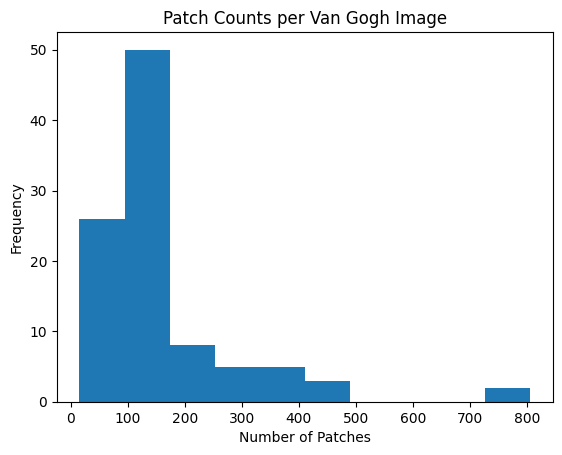

In [24]:
patch_counts = [len(patchify_image(p, 224)) for p in train_van_gogh_images]

import matplotlib.pyplot as plt

plt.hist(patch_counts)
plt.title("Patch Counts per Van Gogh Image")
plt.xlabel("Number of Patches")
plt.ylabel("Frequency")
plt.show()


## non van gogh

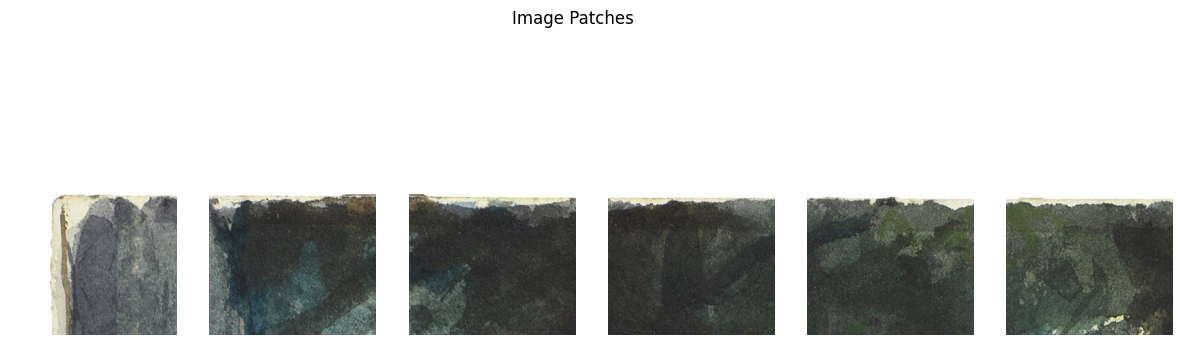

In [ ]:
import sys
sys.path.append('../src')
from preprocessing_patches import patchify_image

image_path = '../data/raw/vgdb_2016/train/nvg/nvg_22490610.png'

patches = patchify_image(Image.open(image_path).convert("RGB"))

# Show first 6 patches
plt.figure(figsize=(15, 5))
for i in range(min(6, len(patches))):
    plt.subplot(1, 6, i+1)
    plt.imshow(patches[i])
    plt.axis('off')
plt.suptitle("Image Patches")
plt.show()


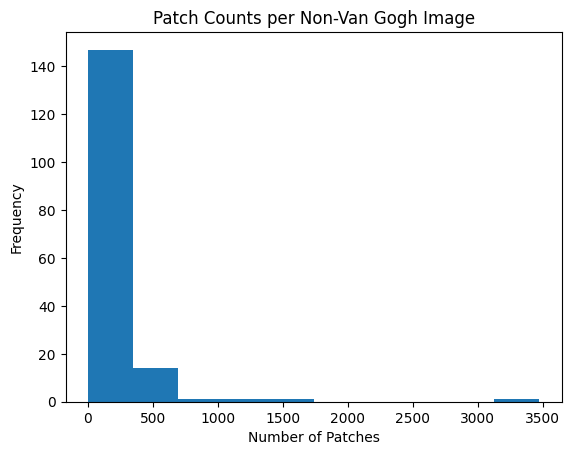

In [25]:
patch_counts_non = [len(patchify_image(p, 224)) for p in train_non_van_gogh_images]

plt.hist(patch_counts_non)
plt.title("Patch Counts per Non-Van Gogh Image")
plt.xlabel("Number of Patches")
plt.ylabel("Frequency")
plt.show()
